<a href="https://colab.research.google.com/github/caioeserpa/Twitter_Scrapping/blob/main/Tweet_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping de Dados do Twitter

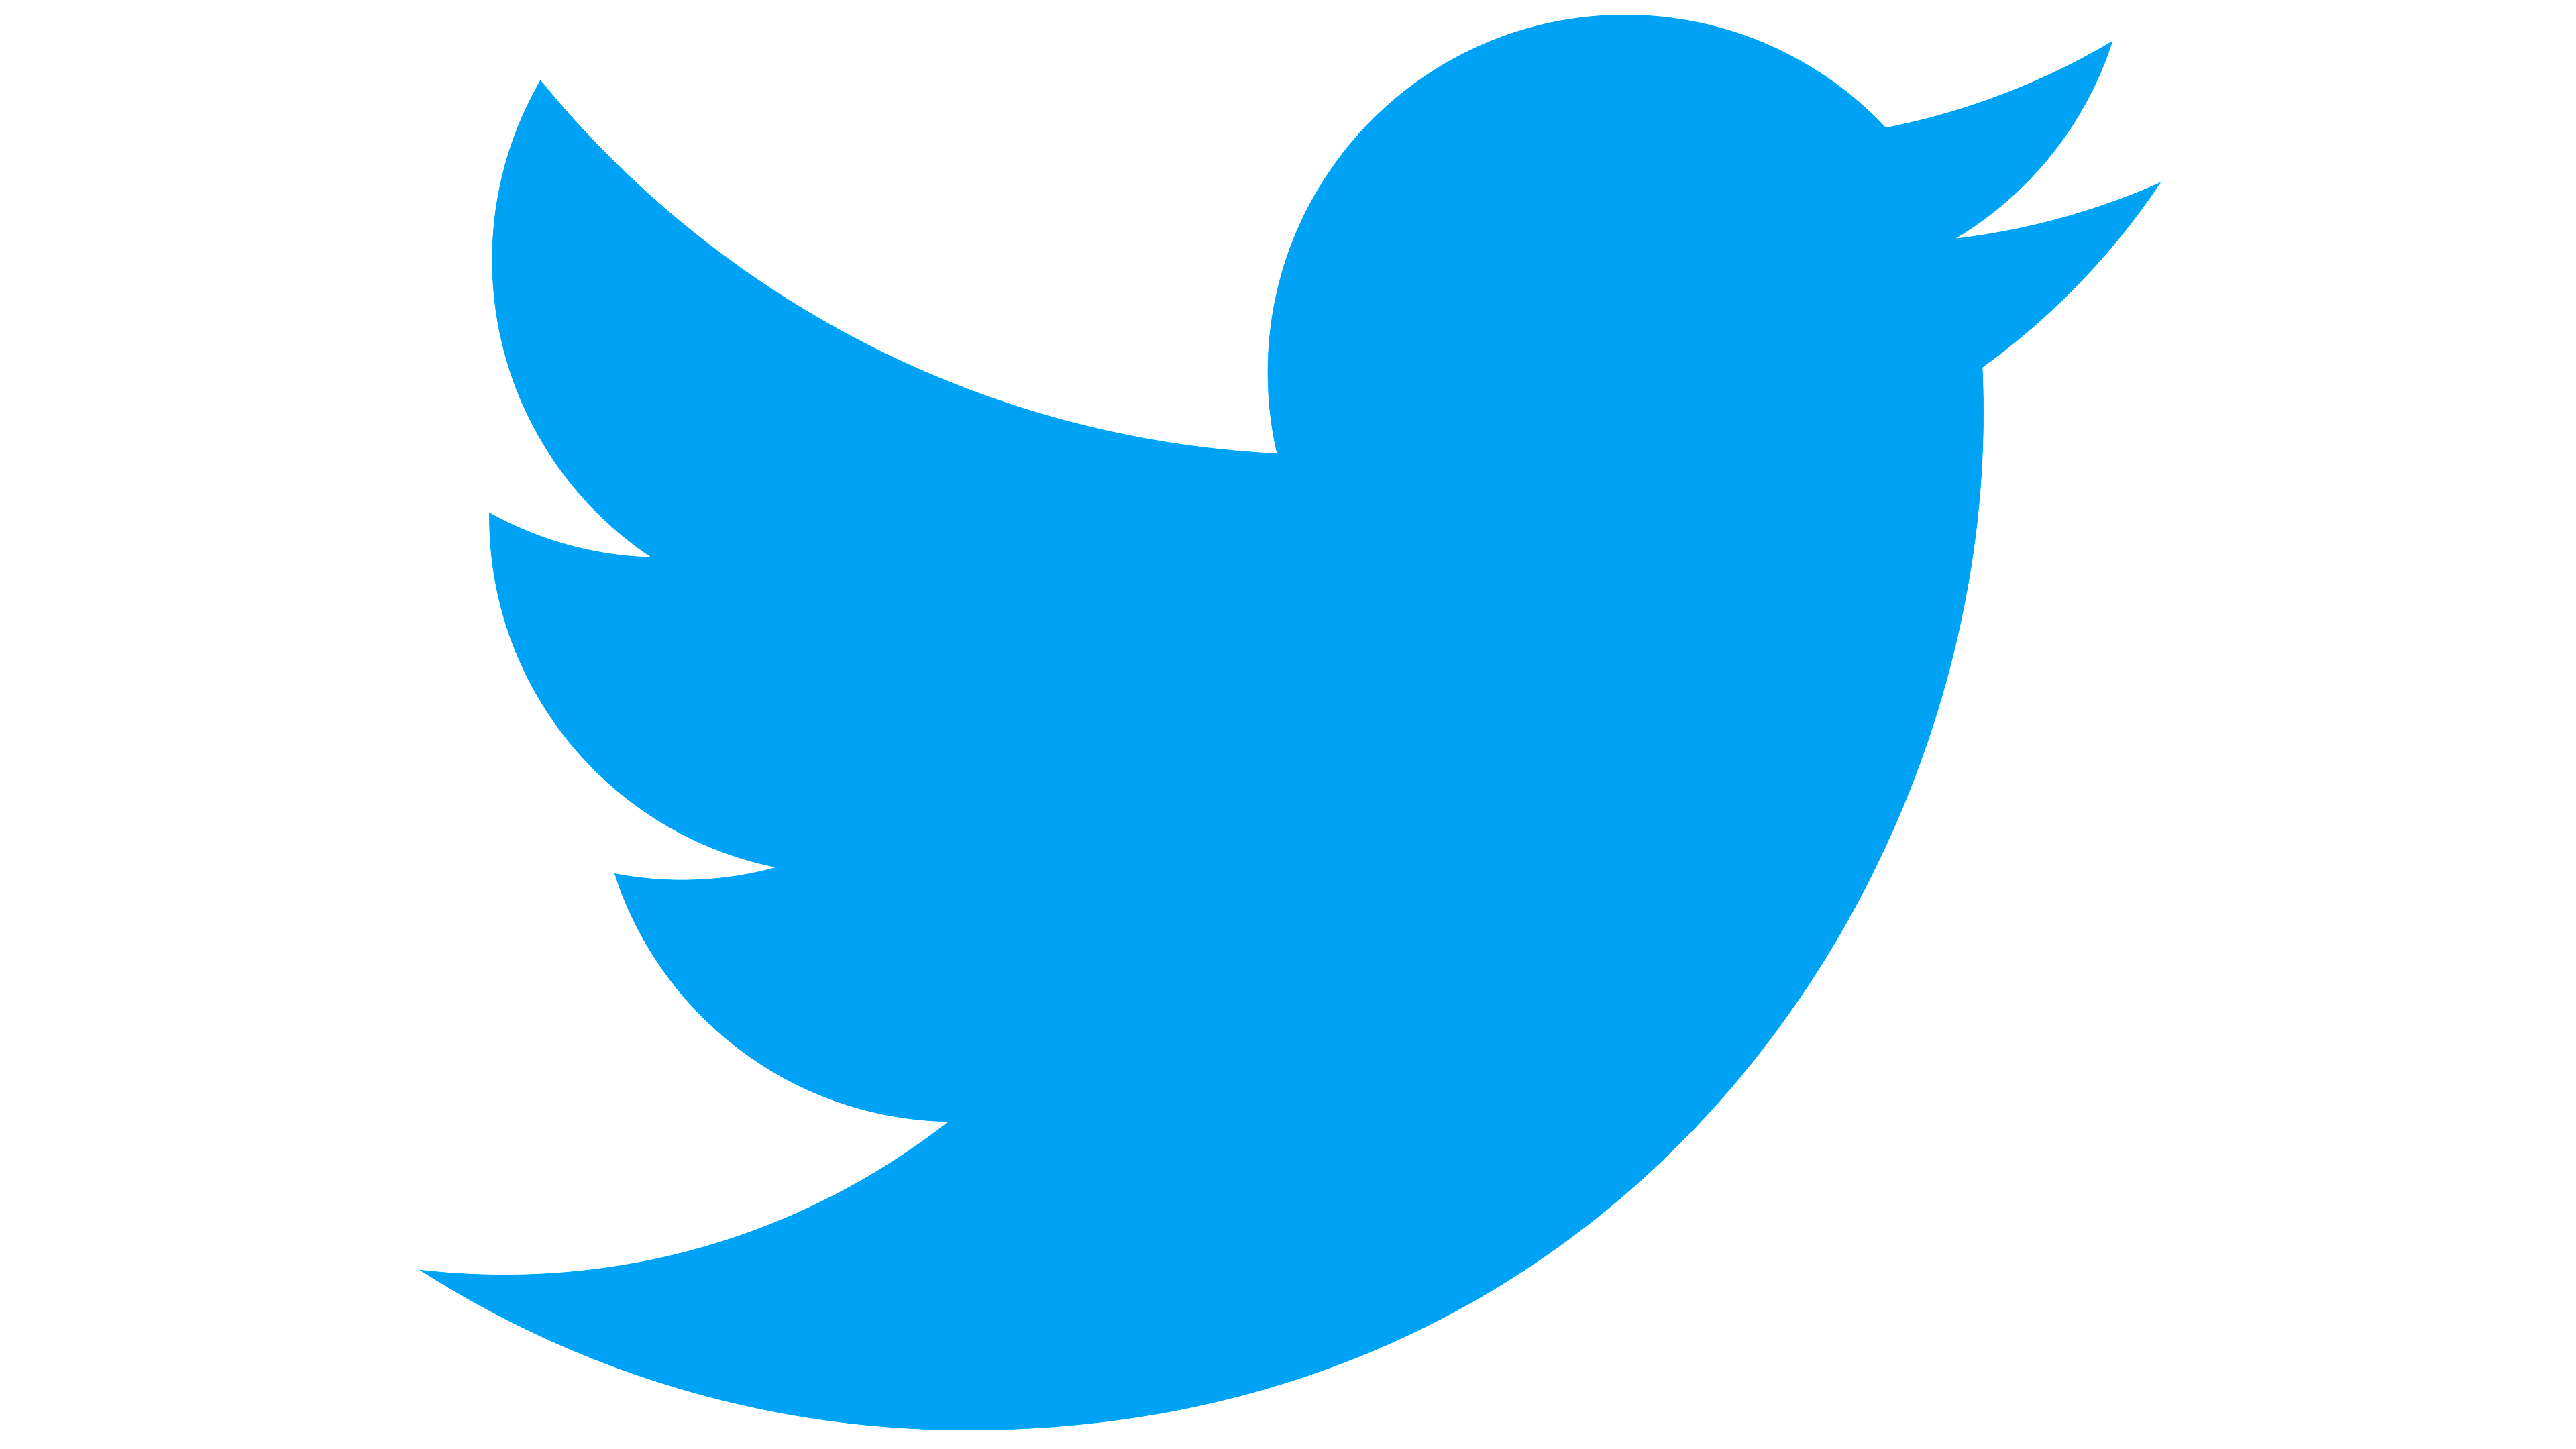

In [ ]:
#Importando bibliotecas

import tweepy as tw
import pandas as pd
from datetime import datetime

In [ ]:
#Verificando a versão do programa

print(tw.__version__)

4.4.0


In [ ]:
#Acessando as chaves de token - o path está na mesma pasta
with open('twitter-tokens.txt', 'r') as tfile: #upload do arquivo com minhas chaves de autenticação
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')


In [ ]:
#Conectando aos tokens
auth =tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()

In [ ]:
#Confirmando se o scrapping está rodando
for tweet in public_tweets:
    print(tweet.text)



[ TTs BR🇧🇷 09:10 ]
#MoroAbreMBL entrou nas principais tendências =&gt; 4⃣ https://t.co/o8ADN5RLDJ
Putin autoriza bancos russos a confiscar dinheiro da população.

As rendas que não forem compatíveis com as declara… https://t.co/9tpesCPsBc
Vestiário do United se surpreendeu com viagem de Cristiano Ronaldo em dia de clássico, diz jornal

Segundo o "The A… https://t.co/ThpxFyAnog
Guerra na Ucrânia: Entenda os detalhes da missão que resgatará brasileiros
https://t.co/YbQ1rNOHXQ
Acompanhe todas as atualizações sobre a guerra na Ucrânia no #ConexãoGloboNews 

➡ Assista na #GloboNews com SINAL… https://t.co/dzP2VF4Csn
Corpos foram encontrados próximos à embarcação na Baía de Ilha Grande.

- Mais notícias no #RedeTVNews, às 21h30.

https://t.co/RTyNNTerta
📢 OFERTA - Amazon #SemanaDoConsumidorAmazon
 
✨ A queridinha! Qualidade máxima garantida! Muito bem avaliada no sit… https://t.co/E4cFnpxJOF
.@colunadoestadao | Integrantes da bancada se reúnem com Rodrigo Pacheco nesta semana para tentar con

In [ ]:
#verificando como está dividido o JSON
tweet._json

{'created_at': 'Mon Mar 07 12:00:02 +0000 2022',
 'id': 1500803459062267909,
 'id_str': '1500803459062267909',
 'text': '☕Bom dia!\n\nEstá no ar o Jornal Rádio PT. Hoje você confere entrevista com Mazé Morais, da CONTAG, e com a vereadora… https://t.co/A54TkuzV8c',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/A54TkuzV8c',
    'expanded_url': 'https://twitter.com/i/web/status/1500803459062267909',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 39522911,
  'id_str': '39522911',
  'name': 'PT Brasil',
  'screen_name': 'ptbrasil',
  'location': 'Brasília / Brasil',
  'description': 'Twitter oficial do Part

In [ ]:
#verificando chaves json para utilizarmos
twkey = tweet._json.keys()
twkey



dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [ ]:
#query de busca por # + filtro de retweets  #Opcional '-filter:replies' 
query_search = '#CopadoNordestenoSBT' + '-filter:retweets' #filtrando twitters únicos que contém a hashtag escolhida

In [ ]:
#Verificando dados e imprimindo - OPCIONAL
# for tweet in cursor_tweets:
#     print(tweet.created_at)
#     print(tweet.user.screen_name)
#     print(tweet.text)
#     try:
#         print(tweet.entities['urls'][0]['url'])
    
#     except IndexError:
#         next
#     except:
#         next
#     print(10*'-')


In [ ]:
# cursor_tweets = tw.Cursor(api.search_tweets,
#          q=query_search,count=1000).items(100)
# for tweet in cursor_tweets:
#  print(tweet.user.name)
     

In [ ]:
#buscando os 1000 primeiros itens definidos pela #copadonesabt e armazenando na lista
cursor_tweets = tw.Cursor(api.search_tweets,
        q=query_search, count=100).items(1000)
data = []
conta = []
descricao = []
url = []
favoritos = []
retweets = []



for tweet in cursor_tweets:
    data.append(tweet.created_at)
    try:
        #conta.append(tweet.screen_name)
        conta.append(tweet.user.name)
    except IndexError:
        next
    except:
        next
    descricao.append(tweet.text)
    try:
        url.append(tweet.entities['urls'][0]['url'])
    except IndexError:
        next
    except:
        next
    favoritos.append(tweet.favorite_count)
    retweets.append(tweet.retweet_count)
    
    

In [ ]:
#Criando dataframe - Dando nome a colunas
df_copadone = pd.DataFrame(columns=['Conta','Descrição', 'Data de Criação', 'URL','Favoritos', 'Retweet'])
df_copadone = pd.DataFrame(list(zip(conta, descricao, data, url, favoritos, retweets)), columns=['Conta','Descrição', 'Data de Criação', 'URL','Favoritos', 'Retweet'])

In [ ]:
df_copadone.head(100)

,Conta,Descrição,Data de Criação,URL,Favoritos,Retweet
0,Amado_tricolor 1918 #timedamoda,"Eu acordando depois do jogo de ontem, @Fortale...",2022-03-06 15:45:55+00:00,https://t.co/GhD6YrmW7I,0,0
1,SBT Nordeste,Vai pegar fogo no Marizão! #CopadoNordestenoSB...,2022-03-06 00:45:00+00:00,https://t.co/PQlP1NjRna,2,0
2,Gláucio Cesar,"Meu filhote @ECBahia, respeita o PAI, gosto as...",2022-03-06 00:42:24+00:00,https://t.co/XR2klaiMFK,2,0
3,SBT Nordeste,Amanhã tem Floresta x Atlético de Alagoinhas p...,2022-03-06 00:30:00+00:00,https://t.co/cRvTELb7oD,1,1
4,DanielCearense🇧🇷🇮🇱,Bora Bora #Vozão + 1\n\n#CopadoNordeste2022 \n...,2022-03-06 00:15:39+00:00,https://t.co/zEpH44CUJz,0,0
...,...,...,...,...,...,...
95,Francisco Nunes,#CopadoNordestenoSBT\nVai bahia 4x2,2022-03-05 22:19:53+00:00,https://t.co/3ASvoKKtmI,1,0
96,Andre ⚪,O grande problema do Sport é que tem menos um ...,2022-03-05 22:19:40+00:00,https://t.co/UxLfyMo5bn,0,0
97,Eduardo Piucco,"19h, Salvador\n\n#AlémDaIlusão 14.7\n#CopaDoNo...",2022-03-05 22:19:04+00:00,https://t.co/og47qJoUYT,2,0
98,Dival Nunes,Ronaldo sempre cumpre bem seu papel quando é a...,2022-03-05 22:19:01+00:00,https://t.co/pRPC5BsHyY,1,0


In [ ]:
#transformando o timezone
df_copadone['Data de Criação'] = df_copadone['Data de Criação'].apply(lambda x: pd.to_datetime(x).date())
df_copadone['Data de Criação']

0      2022-03-06
1      2022-03-06
2      2022-03-06
3      2022-03-06
4      2022-03-06
          ...    
97     2022-03-05
98     2022-03-05
99     2022-03-05
100    2022-03-05
101    2022-03-05
Name: Data de Criação, Length: 102, dtype: object

In [ ]:
#Verificando dataframe
df_copadone

,Conta,Descrição,Data de Criação,URL,Favoritos,Retweet
0,Amado_tricolor 1918 #timedamoda,"Eu acordando depois do jogo de ontem, @Fortale...",2022-03-06,https://t.co/GhD6YrmW7I,0,0
1,SBT Nordeste,Vai pegar fogo no Marizão! #CopadoNordestenoSB...,2022-03-06,https://t.co/PQlP1NjRna,2,0
2,Gláucio Cesar,"Meu filhote @ECBahia, respeita o PAI, gosto as...",2022-03-06,https://t.co/XR2klaiMFK,2,0
3,SBT Nordeste,Amanhã tem Floresta x Atlético de Alagoinhas p...,2022-03-06,https://t.co/cRvTELb7oD,1,1
4,DanielCearense🇧🇷🇮🇱,Bora Bora #Vozão + 1\n\n#CopadoNordeste2022 \n...,2022-03-06,https://t.co/zEpH44CUJz,0,0
...,...,...,...,...,...,...
97,Eduardo Piucco,"19h, Salvador\n\n#AlémDaIlusão 14.7\n#CopaDoNo...",2022-03-05,https://t.co/og47qJoUYT,2,0
98,Dival Nunes,Ronaldo sempre cumpre bem seu papel quando é a...,2022-03-05,https://t.co/pRPC5BsHyY,1,0
99,Dantas André_1,#CopadoNordestenoSBT vai leão 🦁 a falta de Mik...,2022-03-05,https://t.co/RpzTlL1hny,1,0
100,Micheliny Freitas,#CopadoNordestenoSBT \nVou morrer do coração 🩺...,2022-03-05,https://t.co/erPadMCRN0,0,0


In [ ]:
#Exportando para excel 
df_copadone.to_excel('Dados_Copa_Do_Nordeste.xlsx')